In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('.\Dataset\data_trial.csv')

In [4]:
data

,date,tempr,ap,ws,rh,blizzard
0,2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0
1,2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0
2,2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0
3,2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0
4,2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0
...,...,...,...,...,...,...
44683,2021-02-04 19:00:00,-4.58,975.76,3.17,60.35,0
44684,2021-02-04 20:00:00,-3.88,975.98,5.95,51.05,0
44685,2021-02-04 21:00:00,-4.50,976.21,7.17,49.89,0
44686,2021-02-04 22:00:00,-4.98,976.44,7.22,50.56,0


In [5]:
df = pd.DataFrame(data)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.set_index('date', inplace = True)
df

,tempr,ap,ws,rh,blizzard
date,,,,,
2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0
2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0
2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0
2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0
2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0
...,...,...,...,...,...
2021-02-04 19:00:00,-4.58,975.76,3.17,60.35,0
2021-02-04 20:00:00,-3.88,975.98,5.95,51.05,0
2021-02-04 21:00:00,-4.50,976.21,7.17,49.89,0


In [8]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [9]:
sup_data = series_to_supervised(data)
sup_data

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
date,,,,,,,,,,
2016-01-01 01:00:00,1.16,980.83,8.27,67.60,0.0,1.35,980.95,10.91,65.30,0
2016-01-01 02:00:00,1.35,980.95,10.91,65.30,0.0,1.53,981.07,8.59,64.70,0
2016-01-01 03:00:00,1.53,981.07,8.59,64.70,0.0,1.43,981.37,8.18,66.10,0
2016-01-01 04:00:00,1.43,981.37,8.18,66.10,0.0,1.24,981.66,9.19,73.86,0
2016-01-01 05:00:00,1.24,981.66,9.19,73.86,0.0,1.57,981.96,10.45,68.28,0
...,...,...,...,...,...,...,...,...,...,...
2021-02-04 19:00:00,-4.33,975.59,1.94,65.52,0.0,-4.58,975.76,3.17,60.35,0
2021-02-04 20:00:00,-4.58,975.76,3.17,60.35,0.0,-3.88,975.98,5.95,51.05,0
2021-02-04 21:00:00,-3.88,975.98,5.95,51.05,0.0,-4.50,976.21,7.17,49.89,0


In [10]:
from sklearn.ensemble import ExtraTreesRegressor 

model = ExtraTreesRegressor()

In [11]:
from sklearn.model_selection import train_test_split

tX_train, tX_test, ty_train, ty_test = train_test_split(sup_data['var1(t-1)'], sup_data['var1(t)'], test_size = 0.3, shuffle = False)

In [36]:
X = tX_train.to_numpy().reshape(-1,1)
y = ty_train.to_numpy().reshape(-1,1)

model.fit(X, y)

ty_pred = model.predict(tX_test.to_numpy().reshape(-1,1))

<ipython-input-36-1014fdfd5c1b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


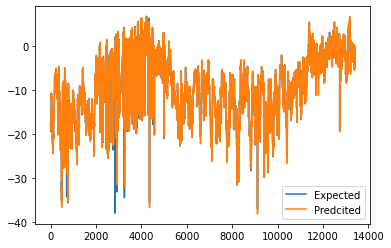

In [37]:
plt.plot(ty_test.to_numpy().reshape(-1,1), label = 'Expected')
plt.plot(ty_pred, label = 'Predcited')
plt.legend()
plt.show()

This is a problem we face everytime we try to calculate the MAPE for temperature data since it has negative values

In [38]:
t_errors = abs(ty_pred - ty_test)

t_mae = round(np.mean(t_errors), 2)
t_mape = 100 * ( t_errors / ty_test)

accuracy = 100 - np.mean(t_mape)
print(accuracy)

nan


# Windspeed Predictions 


In [15]:
wX_train, wX_test, wy_train, wy_test = train_test_split(sup_data['var3(t-1)'], sup_data['var3(t)'], test_size = 0.3, shuffle = False)

In [33]:
wX = wX_train.to_numpy().reshape(-1,1)
wy = wy_train.to_numpy().reshape(-1,1)

model.fit(wX, wy)

wy_pred = model.predict(wX_test.to_numpy().reshape(-1,1))

<ipython-input-33-28d98efa93f3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(wX, wy)


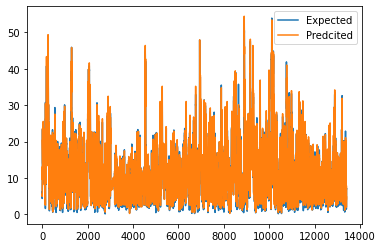

In [34]:
plt.plot(wy_test.to_numpy().reshape(-1,1), label = 'Expected')
plt.plot(wy_pred, label = 'Predcited')
plt.legend()
plt.show()

In [35]:
w_errors = abs(wy_pred - wy_test)

w_mae = round(np.mean(w_errors), 2)
w_mape = 100 * ( w_errors / wy_test)

accuracy = 100 - np.mean(w_mape)
print(accuracy)

73.79923424131125


# Atmospheric Pressure predictions

In [19]:
aX_train, aX_test, ay_train, ay_test = train_test_split(sup_data['var2(t-1)'], sup_data['var2(t)'], test_size = 0.3, shuffle = False)

In [30]:
aX = aX_train.to_numpy().reshape(-1,1)
ay =ay_train.to_numpy().reshape(-1,1)

model.fit(aX, ay)

ay_pred = model.predict(aX_test.to_numpy().reshape(-1,1))

<ipython-input-30-3b042978c801>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(aX, ay)


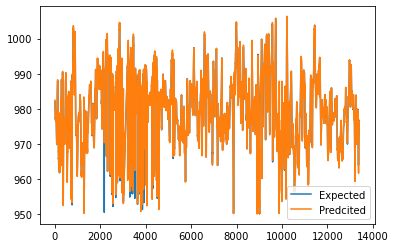

In [31]:
plt.plot(ay_test.to_numpy().reshape(-1,1), label = 'Expected')
plt.plot(ay_pred, label = 'Predcited')
plt.legend()
plt.show()

In [32]:
a_errors = abs(ay_pred - ay_test)

a_mae = round(np.mean(a_errors), 2)
a_mape = 100 * ( a_errors / ay_test)

accuracy = 100 - np.mean(a_mape)
print(accuracy)

99.93109007528192


# RH Predictions

In [23]:
rX_train, rX_test, ry_train, ry_test = train_test_split(sup_data['var4(t-1)'], sup_data['var4(t)'], test_size = 0.3, shuffle = False)

In [27]:
rX = rX_train.to_numpy().reshape(-1,1)
ry = ry_train.to_numpy().reshape(-1,1)

model.fit(rX, ry)

ry_pred = model.predict(rX_test.to_numpy().reshape(-1,1))

<ipython-input-27-2baaa25d0c8f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(rX, ry)


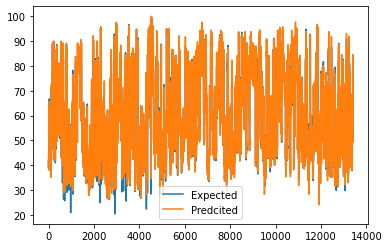

In [28]:
plt.plot(ry_test.to_numpy().reshape(-1,1), label = 'Expected')
plt.plot(ry_pred, label = 'Predcited')
plt.legend()
plt.show()

In [29]:
r_errors = abs(ry_pred - ry_test)

r_mae = round(np.mean(r_errors), 2)
r_mape = 100 * ( r_errors / ry_test)

accuracy = 100 - np.mean(r_mape)
print(accuracy)

94.92579291809507
